For my dataset, I am using the Breast Cancer Data set accessed here: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer

# Problem Statement

Breast cancer is the most common cause of cancer found in women in the United States and worldwide accounting for 25.4% of the total number of new cases diagnosed in 2018. In the United State, 276,480 new cases were estimated for 2020. This estimate does not include reoccurrence. 42,170 breast cancer deaths were estimated for 2020 in the United States. Everybody that has survived breast cancer has a high risk of reoccurrence. The time of reoccurrence may depend on a number of factors. Being able to predict the reoccurrence of breast cancer for breast cancer survivals might better help them plan for the future.

# Proposal

I will be using the breast cancer data set gotten from the UCI link that was posted in the announcement section of the course on blackboard eight days ago. The data set has 10 attributes (nine columns/variables) which have the characteristic I will be looking at to try and predict the reoccurrence. The dataset is a multivariate data set with 286 instances (observations/rows) and some missing values. The dataset (target data) has two labels of no-recurrence-events and recurrence-events. The dataset was gotten in 1988. This is a supervised learning problem where we will be using a binary classification algorithms, specifically the logistics regression to predict the reoccurence of breast cancer. I would load the dataset, inspect it, then perform Exploratory Data analysis, convert it to arrays. After this I would split the data into a train and test data. I would then perform feature reduction using PCA.

I will be evaluating the performance of two tuned basic model frameworks to understand if a small dataset would accurately classify the reoccurrence of breast cancer into no reoccurrence event and reoccurrence event. The data is already in a binary classification form. I would be using a confusion matrix to evaluate this model. A Confusion matrix is used for a binary classification which is what is used in this case. Furthermore it tells us the sensitivity and the specificity of the test which are important indices used in the healthcare field. 

I would also use the F1 score. This would show the precision, recall and F1-scores. 

I would also be using the Area Under the Precision-Recall Curve. I am interested in using this metrics as it is stable under class-imbalance, allowing me to focus on the tradeoffs of precision and recall.


# Dimensionality Reduction

For dimensionality reduction,the Principal Component Analysis (PCA) and the Matrix factorization technique were utilized. At 99% the full 9 features were used. The data consisted of nine features. this was also plotted.

In [1]:
import pandas as pd
import sweetviz as sv
from autoviz.AutoViz_Class import AutoViz_Class
from matplotlib import __version__ as mpv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklv
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, average_precision_score, make_scorer
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Imported AutoViz_Class version: 0.0.71. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


In [3]:
df = pd.read_csv('F:/breast-cancer.data.txt',header=None)
df.columns = ["Class", "Age", "Menopause", "Tumor-Size", "Inv-Nodes", "Node_Caps","Deg-Malig","Breast","Breast-Quad","Irradiation"]
df.head()

,Class,Age,Menopause,Tumor-Size,Inv-Nodes,Node_Caps,Deg-Malig,Breast,Breast-Quad,Irradiation
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   Age          286 non-null    object
 2   Menopause    286 non-null    object
 3   Tumor-Size   286 non-null    object
 4   Inv-Nodes    286 non-null    object
 5   Node_Caps    286 non-null    object
 6   Deg-Malig    286 non-null    int64 
 7   Breast       286 non-null    object
 8   Breast-Quad  286 non-null    object
 9   Irradiation  286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [5]:
len(df)

286

In [6]:
df.shape

(286, 10)

In [7]:
df["Class"].value_counts()

no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64

In [8]:
df.describe

<bound method NDFrame.describe of                     Class    Age Menopause Tumor-Size Inv-Nodes Node_Caps  \
0    no-recurrence-events  30-39   premeno      30-34       0-2        no   
1    no-recurrence-events  40-49   premeno      20-24       0-2        no   
2    no-recurrence-events  40-49   premeno      20-24       0-2        no   
3    no-recurrence-events  60-69      ge40      15-19       0-2        no   
4    no-recurrence-events  40-49   premeno        0-4       0-2        no   
..                    ...    ...       ...        ...       ...       ...   
281     recurrence-events  30-39   premeno      30-34       0-2        no   
282     recurrence-events  30-39   premeno      20-24       0-2        no   
283     recurrence-events  60-69      ge40      20-24       0-2        no   
284     recurrence-events  40-49      ge40      30-34       3-5        no   
285     recurrence-events  50-59      ge40      30-34       3-5        no   

     Deg-Malig Breast Breast-Quad Irradia

In [9]:
df.describe()

,Deg-Malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [10]:
df.describe(include=['O'])

,Class,Age,Menopause,Tumor-Size,Inv-Nodes,Node_Caps,Breast,Breast-Quad,Irradiation
count,286,286,286,286,286,286,286,286,286
unique,2,6,3,11,7,3,2,6,2
top,no-recurrence-events,50-59,premeno,30-34,0-2,no,left,left_low,no
freq,201,96,150,60,213,222,152,110,218


In [11]:
sweetviz_report = sv.analyze(df)

In [12]:
sweetviz_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
AV = AutoViz_Class()

Shape of your Data Set: (285, 10)
Classifying variables in data set...
    10 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set
Nothing to add Plot not being added
Nothing to add Plot not being added
Time to run AutoViz (in seconds) = 6.062


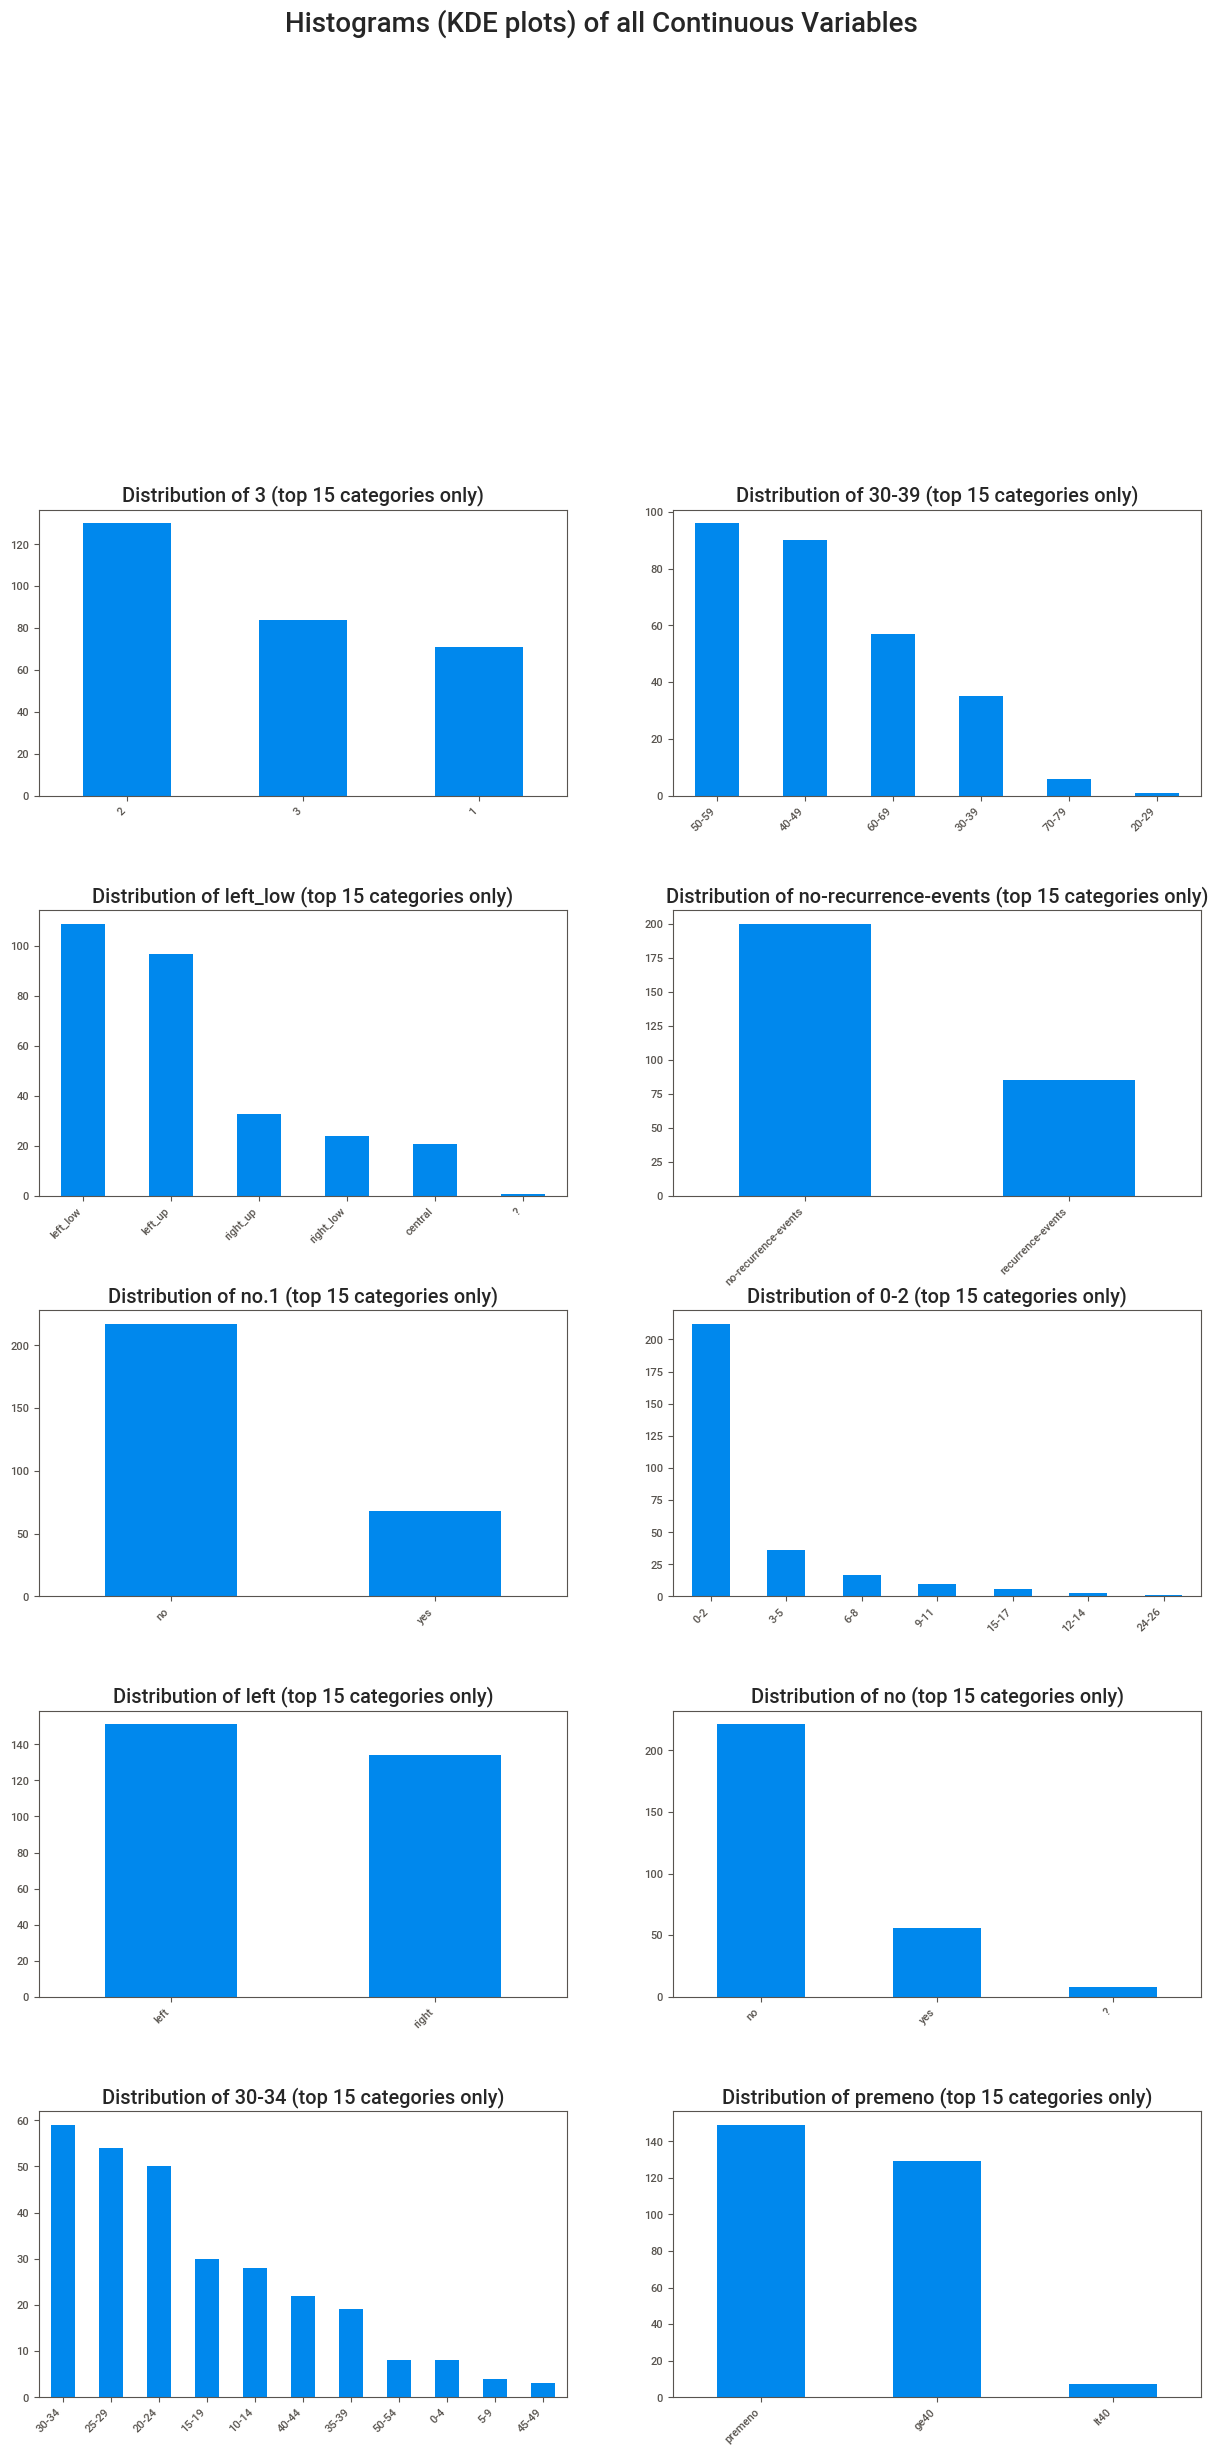

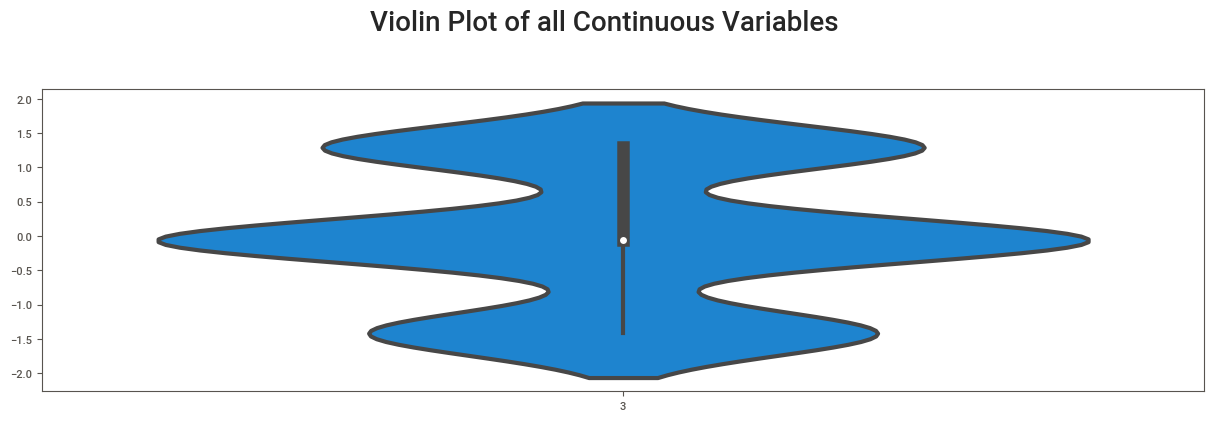

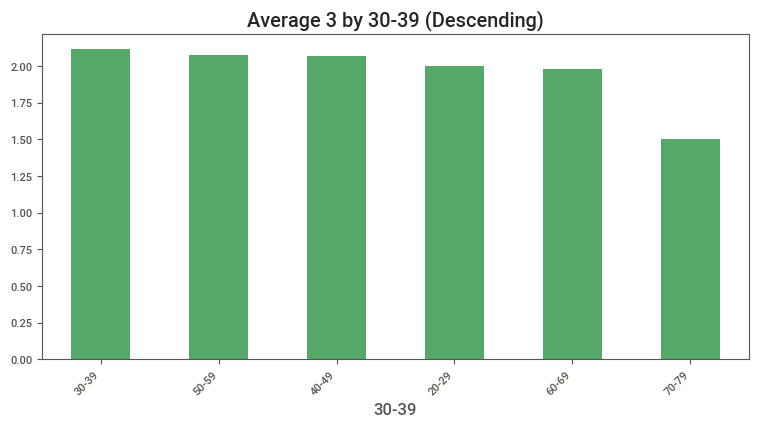

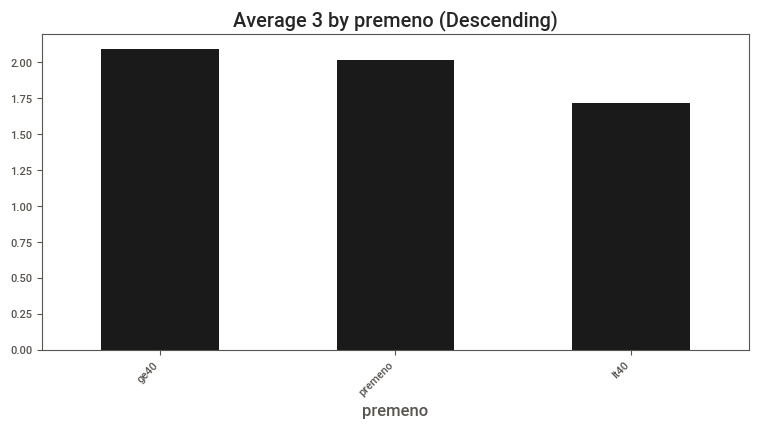

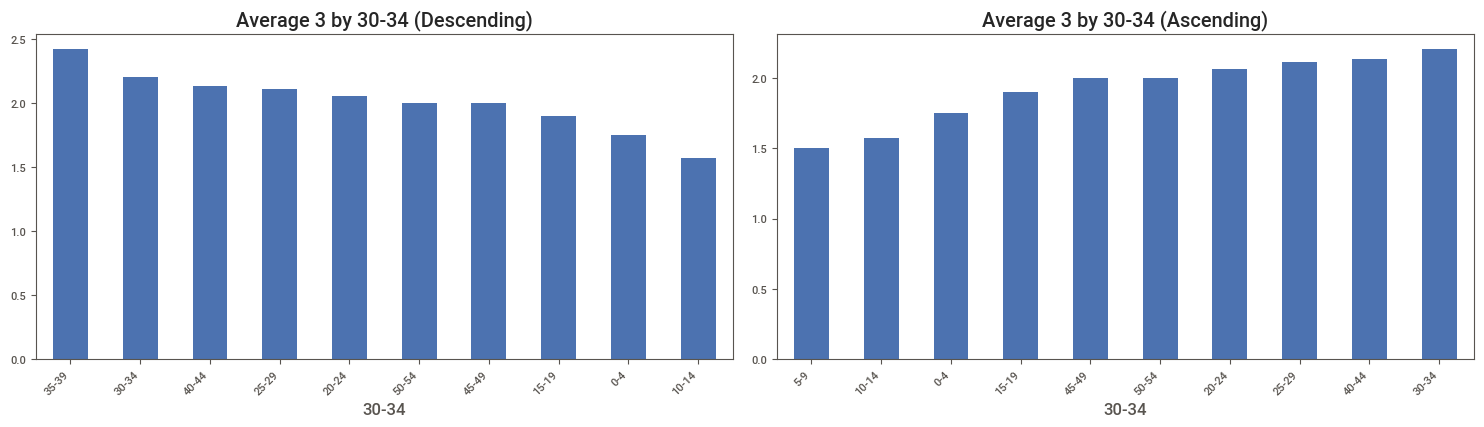

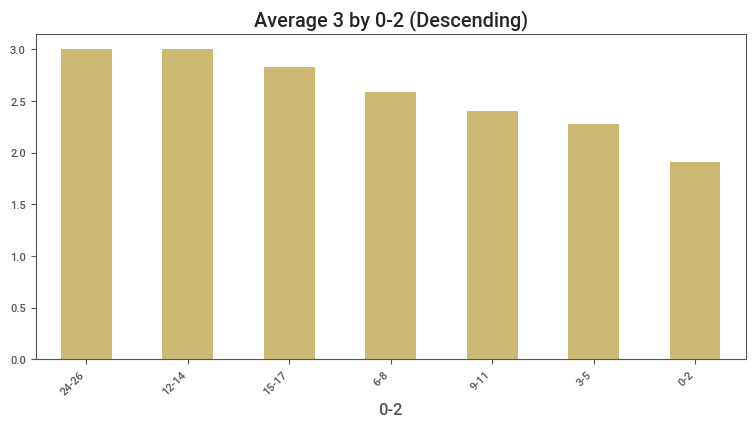

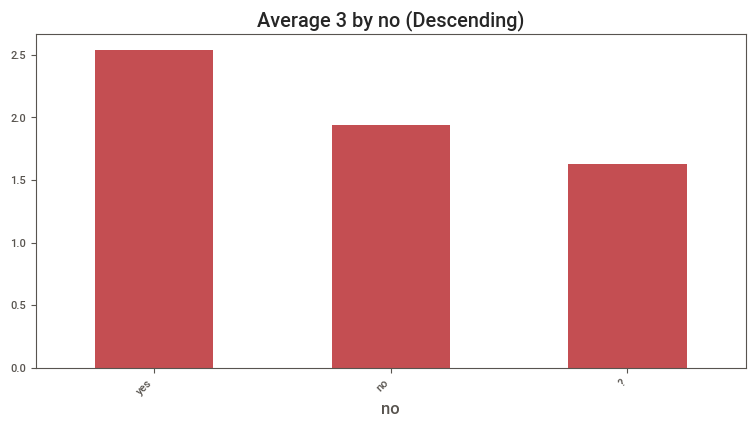

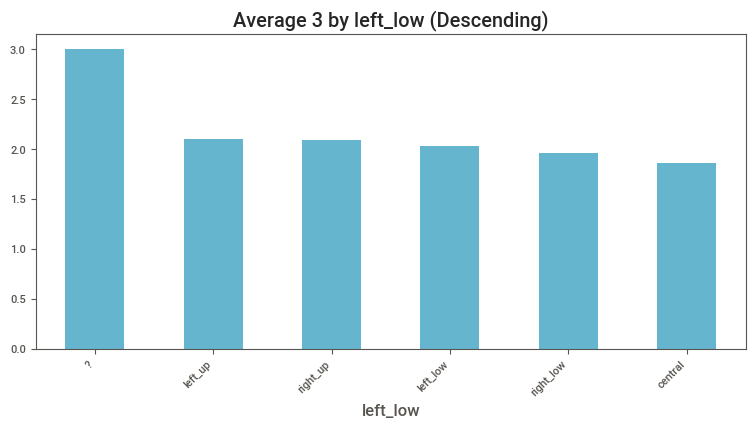

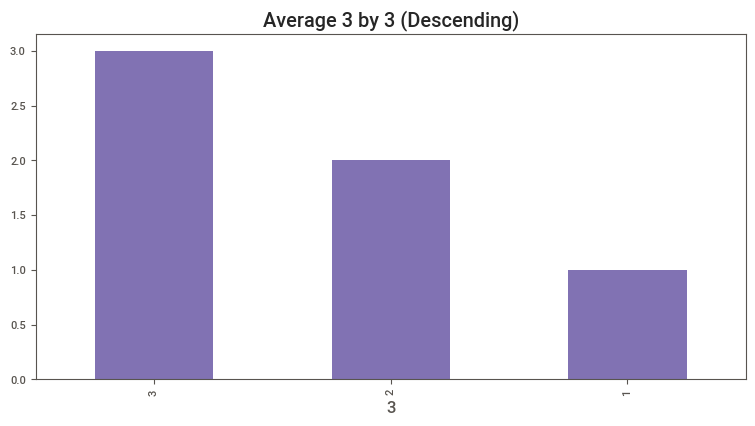

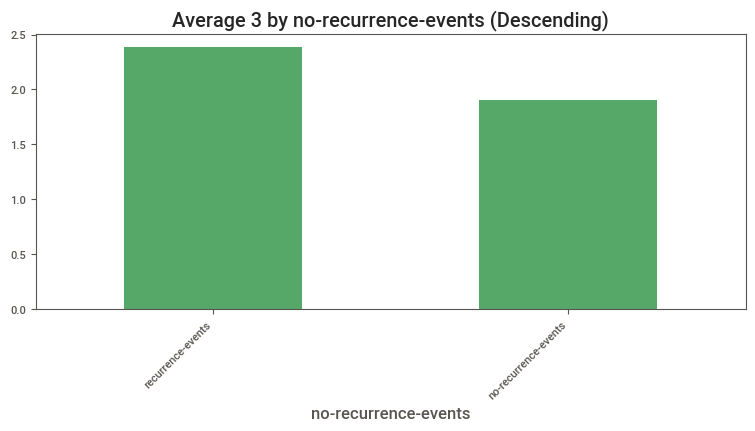

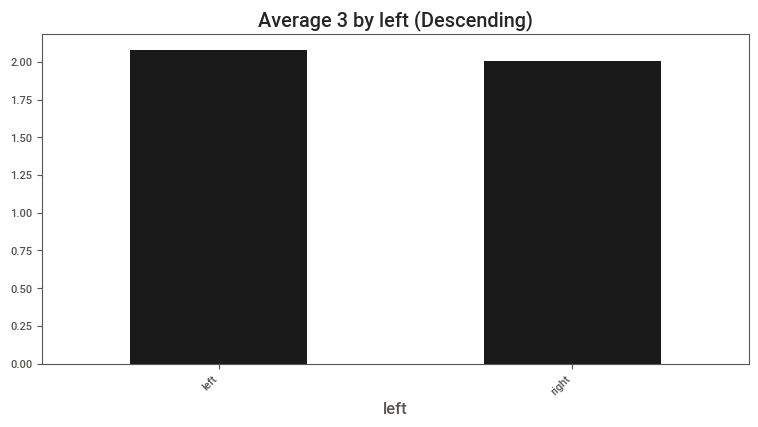

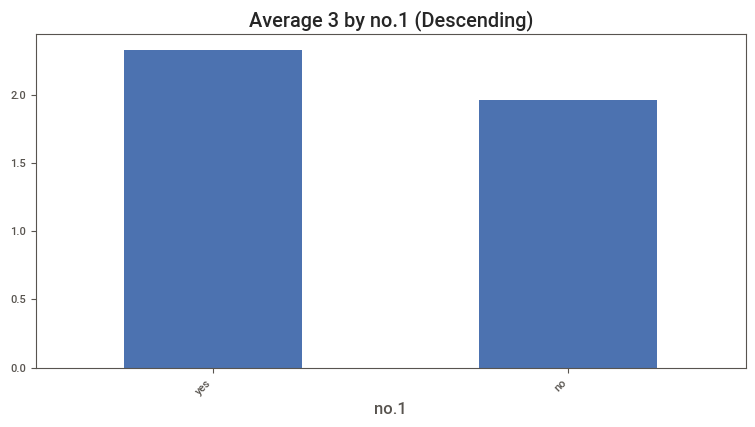

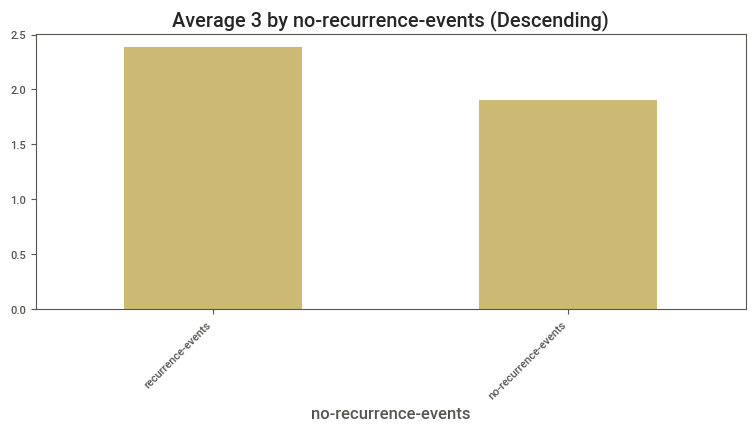

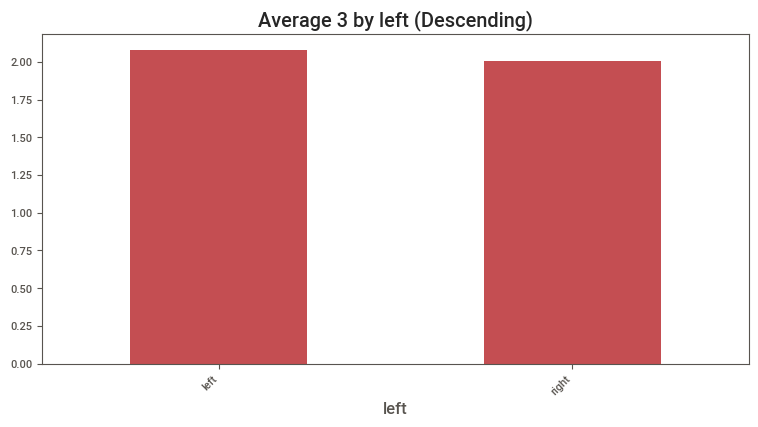

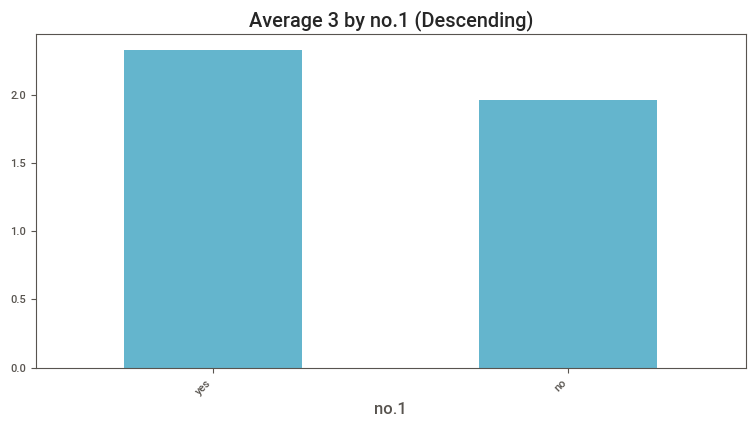

In [14]:
df_1 = AV.AutoViz('C:/Users/18175/OneDrive/Desktop/breast-cancer.data.txt')

In [15]:
lb_make = LabelEncoder()
df["Class"] = lb_make.fit_transform(df["Class"])
df["Age"] = lb_make.fit_transform(df["Age"])
df["Menopause"] = lb_make.fit_transform(df["Menopause"])
df["Tumor-Size"] = lb_make.fit_transform(df["Tumor-Size"])
df["Inv-Nodes"] = lb_make.fit_transform(df["Inv-Nodes"])
df["Node_Caps"] = lb_make.fit_transform(df["Node_Caps"])
df["Breast"] = lb_make.fit_transform(df["Breast"])
df["Breast-Quad"] = lb_make.fit_transform(df["Breast-Quad"])
df["Irradiation"] = lb_make.fit_transform(df["Irradiation"])
df.head(20)

,Class,Age,Menopause,Tumor-Size,Inv-Nodes,Node_Caps,Deg-Malig,Breast,Breast-Quad,Irradiation
0,0,1,2,5,0,1,3,0,2,0
1,0,2,2,3,0,1,2,1,5,0
2,0,2,2,3,0,1,2,0,2,0
3,0,4,0,2,0,1,2,1,3,0
4,0,2,2,0,0,1,2,1,4,0
5,0,4,0,2,0,1,2,0,2,0
6,0,3,2,4,0,1,2,0,2,0
7,0,4,0,3,0,1,1,0,2,0
8,0,2,2,10,0,1,2,0,2,0
9,0,2,2,3,0,1,2,1,3,0


In [16]:
df["Class"].value_counts()

0    201
1     85
Name: Class, dtype: int64

In [17]:
x = df.to_numpy()

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[1:]],
                                                    df['Class'],
                                                    train_size=0.75,
                                                    random_state=30,
                                                    stratify=df['Class'])
print("No. of samples in training set: ", x_train.shape[0])
print("No. of samples in test set:", x_test.shape[0])

No. of samples in training set:  214
No. of samples in test set: 72


In [19]:
x_train.head()

,Age,Menopause,Tumor-Size,Inv-Nodes,Node_Caps,Deg-Malig,Breast,Breast-Quad,Irradiation
92,3,0,4,0,1,2,1,3,0
186,3,0,4,0,1,1,0,4,0
110,3,0,4,0,1,1,0,2,0
190,2,2,2,1,1,3,1,4,1
103,2,2,3,0,1,2,0,4,0


In [20]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 92 to 218
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          214 non-null    int32
 1   Menopause    214 non-null    int32
 2   Tumor-Size   214 non-null    int32
 3   Inv-Nodes    214 non-null    int32
 4   Node_Caps    214 non-null    int32
 5   Deg-Malig    214 non-null    int64
 6   Breast       214 non-null    int32
 7   Breast-Quad  214 non-null    int32
 8   Irradiation  214 non-null    int32
dtypes: int32(8), int64(1)
memory usage: 10.0 KB


In [21]:
y_train.head()

92     0
186    0
110    0
190    0
103    0
Name: Class, dtype: int32

In [22]:
features = StandardScaler().fit_transform(x_train)

In [23]:
x_train.shape

(214, 9)

In [24]:
pca = PCA(n_components=0.99, whiten=True)
features_pca = pca.fit_transform(features)
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1])

Original number of features: 9
Reduced number of features: 9


# Model Selection

In [25]:
from sklearn import linear_model

In [26]:
# Create logistic regression
logistic = linear_model.LogisticRegression()

In [27]:
# Create range of candidate penalty hyperparameter values
penalty = ['l1', 'l2']
# Create range of candidate regularization hyperparameter values
C = np.logspace(0, 4, 10)
# Create dictionary hyperparameter candidates
hyperparameters = dict(C=C, penalty=penalty)
# Create grid search
gridsearch = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [28]:
# Fit grid search
best_model = gridsearch.fit(x_train, y_train)
best_model

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
            

In [29]:
np.logspace(0, 4, 10)

array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04])

# After applying GridSearchCV, we can see the hyperparameters of the Best model

In [30]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [31]:
# Predict target vector
best_model.predict(x_train)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

# Model Evaluation

In [32]:
y_pred = best_model.predict(x_train)

In [33]:
from sklearn import metrics

In [34]:
score = best_model.score(x_train, y_train) # accuracy of model
score

0.7710280373831776

# Confusion Matrix

In [35]:
cmf=metrics.confusion_matrix(y_train, y_pred)
cmf

array([[142,   8],
       [ 41,  23]], dtype=int64)

Text(0.5, 1, 'Accuracy Score: 0.7710280373831776')

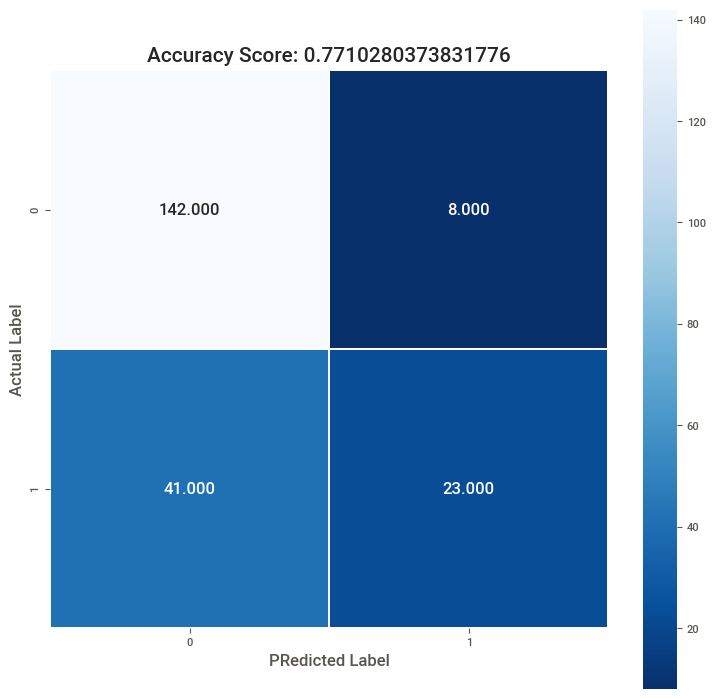

In [36]:
plt.figure(figsize=(9,9))
sns.heatmap(cmf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap='Blues_r');
plt.ylabel('Actual Label');
plt.xlabel('PRedicted Label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15)

The above confusion matrix shows that the TN (true negative) is 142; The FP (False Positive) is 8; The False Negative (FN) is 41 and the True Positive (TP) is 23. The accuracy was also 77.104%. The specificity is therefore 94.66%. This is the ability of the test to be negative (Non-reoccurence) when it is truely negative. The sensitivity of the algorithm is 35.93%. 

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [38]:
accuracy_score(y_train, y_pred)

0.7710280373831776

In [39]:
precision_score(y_train, y_pred)

0.7419354838709677

In [40]:
recall_score(y_train, y_pred)

0.359375

In [41]:
from sklearn import model_selection
from sklearn.metrics import classification_report

In [42]:
report = classification_report(y_train, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.95      0.85       150
           1       0.74      0.36      0.48        64

    accuracy                           0.77       214
   macro avg       0.76      0.65      0.67       214
weighted avg       0.77      0.77      0.74       214



The above shows the precision, recall and F1-score for non-reoccurence and reoccurence. 

In [43]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

In [44]:
target_probabilities = best_model.predict_proba(x_train)[:,1]

In [45]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train,
                                                               target_probabilities)

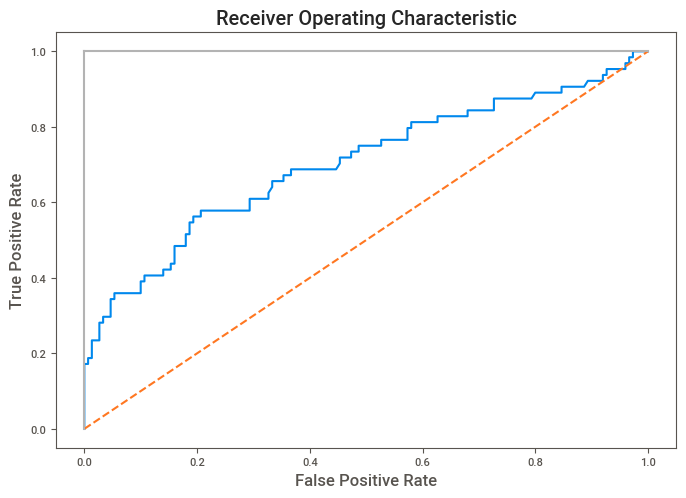

In [46]:
# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

# Comments: Based on how far the curve is from the diagonal line, this model is good at discriminating between positives and negatives in general. It may be useful to calculate the Area Under the Curve (AUC) and Youden Index.

In [47]:
roc_auc_score(y_train, target_probabilities)

0.7028125000000001

The area under the curve (AUC) is 70.28%. This is a measure of how well the parameter can distinguish between non-reoccurence and reoccurence of breast cancer.

# Evaluate the quality of your data

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
cross_val_score(best_model, x_train, y_train, scoring="accuracy",)

array([0.72093023, 0.72093023, 0.65116279, 0.72093023, 0.73809524])

In [50]:
cross_val_score(best_model, x_train, y_train, scoring="precision")

array([0.6       , 0.54545455, 0.375     , 0.57142857, 0.6       ])

In [51]:
cross_val_score(best_model, x_train, y_train, scoring="recall")

array([0.23076923, 0.46153846, 0.23076923, 0.30769231, 0.25      ])

In [52]:
cross_val_score(best_model, x_train, y_train, scoring="f1")

array([0.33333333, 0.5       , 0.28571429, 0.4       , 0.35294118])

# Fit to Dataset

In [53]:
y_pred_1 = best_model.predict(x_test)
score = best_model.score(x_test, y_test) # accuracy of model
score

0.7083333333333334

In [54]:
cmf=metrics.confusion_matrix(y_test, y_pred_1)
cmf

array([[43,  8],
       [13,  8]], dtype=int64)

Text(0.5, 1, 'Accuracy Score: 0.7083333333333334')

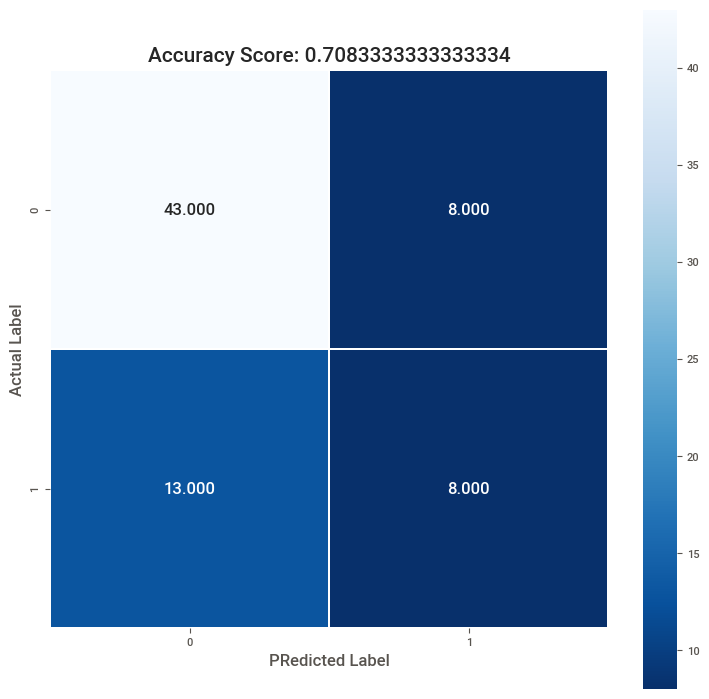

In [55]:
plt.figure(figsize=(9,9))
sns.heatmap(cmf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap='Blues_r');
plt.ylabel('Actual Label');
plt.xlabel('PRedicted Label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15)

In [56]:
report = classification_report(y_test, y_pred_1)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.84      0.80        51
           1       0.50      0.38      0.43        21

    accuracy                           0.71        72
   macro avg       0.63      0.61      0.62        72
weighted avg       0.69      0.71      0.70        72



In [59]:
target_probabilities_1 = best_model.predict_proba(x_test)[:,1]

In [60]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,
                                                               target_probabilities_1)

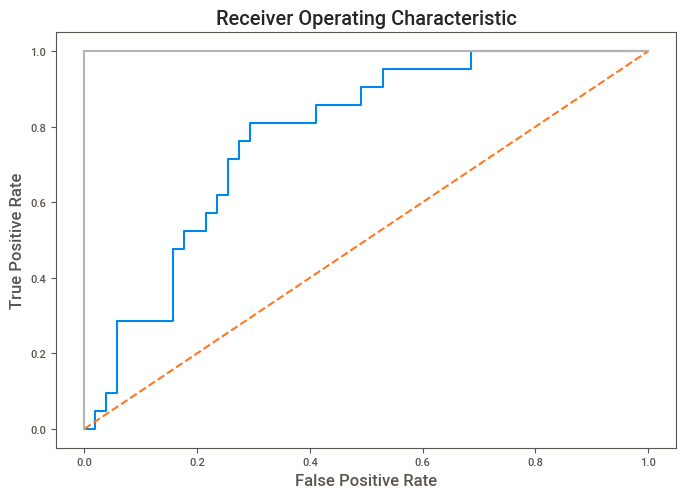

In [61]:
# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [62]:
roc_auc_score(y_test, target_probabilities_1)

0.7740429505135387

In [57]:
from sklearn.metrics import log_loss

In [58]:
log_loss(y_test, y_pred_1)

10.07389862600786

The Recall is very close to the experiments performed. Therefore, I can say with confidence that the experiment was well excuted and I believe that the model will perform similarly on future unseen/unused data. The Area Under
the Precision-Recall Curve is 0.774, which shows that the model performed well but there is still room
for improvement.